# HR Data Analytics Internship 개인 과제

## 전복의 physical 특징을 기반으로 나이를 예측

### 데이터 특성

|구분|단위|상세설명|
|------|---|---|
|성별|-|M: male, F: female, I: infant|
|길이|inch|전복의 가장 긴 단면길이|
|지름|inch|전복의 가장 짧은 단면길이|
|높이|inch|전복의 높이|
|총무게|lb|전복 전체의 무게|
|속살무게|lb|전복 속살의 무게|
|내장무게|lb|전복 내장의 무게|
|나이|years|전복의 나이|

### 데이터 불러오기

In [1]:
import pandas as pd

In [2]:
raw_data = pd.read_excel('2020 HR Data Analytics 데이터 (사후과제시 열람).xlsx', sheet_name = 1)
raw_data.head()

,ID,성별,길이,지름,높이,총무게,속살무게,내장무게,나이
0,1,M,4.55,3.65,0.95,0.5140,0.2245,0.1010,15
1,2,M,3.50,2.65,0.90,0.2255,0.0995,0.0485,7
2,3,F,5.30,4.20,1.35,0.6770,0.2565,0.1415,9
3,4,M,4.40,3.65,1.25,0.5160,0.2155,0.1140,10
4,5,I,3.30,2.55,0.80,0.2050,0.0895,0.0395,7


### 정규화

In [3]:
data_age = raw_data[["나이"]]
data = raw_data.drop("나이", axis=1)

In [4]:
data

,ID,성별,길이,지름,높이,총무게,속살무게,내장무게
0,1,M,4.55,3.65,0.95,0.5140,0.2245,0.1010
1,2,M,3.50,2.65,0.90,0.2255,0.0995,0.0485
2,3,F,5.30,4.20,1.35,0.6770,0.2565,0.1415
3,4,M,4.40,3.65,1.25,0.5160,0.2155,0.1140
4,5,I,3.30,2.55,0.80,0.2050,0.0895,0.0395
...,...,...,...,...,...,...,...,...
4172,4173,F,5.65,4.50,1.65,0.8870,0.3700,0.2390
4173,4174,M,5.90,4.40,1.35,0.9660,0.4390,0.2145
4174,4175,M,6.00,4.75,2.05,1.1760,0.5255,0.2875
4175,4176,F,6.25,4.85,1.50,1.0945,0.5310,0.2610


#### 길이, 지름, 높이, 총무게, 속살무게, 내장무게

##### Min-Max Normalization

In [5]:
data["길이"] = (data["길이"] - min(data["길이"])) / (max(data["길이"]) - min(data["길이"]))
data["지름"] = (data["지름"] - min(data["지름"])) / (max(data["지름"]) - min(data["지름"]))
data["높이"] = (data["높이"] - min(data["높이"])) / (max(data["높이"]) - min(data["높이"]))
data["총무게"] = (data["총무게"] - min(data["총무게"])) / (max(data["총무게"]) - min(data["총무게"]))
data["속살무게"] = (data["속살무게"] - min(data["속살무게"])) / (max(data["속살무게"]) - min(data["속살무게"]))
data["내장무게"] = (data["내장무게"] - min(data["내장무게"])) / (max(data["내장무게"]) - min(data["내장무게"]))

In [6]:
# 범주형 특징(성별)에 대한 원핫 인코딩
from sklearn.preprocessing import OneHotEncoder

data_cat = data[["성별"]]
onehot_encoder = OneHotEncoder()
data_cat_onehot = onehot_encoder.fit_transform(data_cat)
print(onehot_encoder.categories_)

[array(['F', 'I', 'M'], dtype=object)]


#### 범주형 특징 제거

In [7]:
data = data.drop("성별", axis=1)
data = data.drop("ID", axis=1)
data

,길이,지름,높이,총무게,속살무게,내장무게
0,0.513514,0.050832,0.278689,0.181335,0.150303,0.132324
1,0.371622,0.032348,0.262295,0.079157,0.066241,0.063199
2,0.614865,0.060998,0.409836,0.239065,0.171822,0.185648
3,0.493243,0.050832,0.377049,0.182044,0.144250,0.149440
4,0.344595,0.030499,0.229508,0.071897,0.059516,0.051350
...,...,...,...,...,...,...
4172,0.662162,0.066543,0.508197,0.313441,0.248151,0.314022
4173,0.695946,0.064695,0.409836,0.341420,0.294553,0.281764
4174,0.709459,0.071165,0.639344,0.415796,0.352724,0.377880
4175,0.743243,0.073013,0.459016,0.386931,0.356422,0.342989


### 원핫인코딩된 범주형 특징과 스케일링된 수치형 특징 및 레이블 결합

In [8]:
import numpy as np
data = np.c_[data_cat_onehot.toarray(), data, data_age]
data

array([[ 0.        ,  0.        ,  1.        , ...,  0.15030262,
         0.1323239 , 15.        ],
       [ 0.        ,  0.        ,  1.        , ...,  0.06624075,
         0.06319947,  7.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.17182246,
         0.18564845,  9.        ],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  0.3527236 ,
         0.37788018,  9.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.35642233,
         0.34298881, 10.        ],
       [ 0.        ,  0.        ,  1.        , ...,  0.63517149,
         0.49506254, 12.        ]])

In [9]:
data = pd.DataFrame(data, columns=['성별_F', '성별_I', '성별_M', '길이', '지름', '높이', '총무게', '속살무게', '내장무게', '나이'])
data

,성별_F,성별_I,성별_M,길이,지름,높이,총무게,속살무게,내장무게,나이
0,0.0,0.0,1.0,0.513514,0.050832,0.278689,0.181335,0.150303,0.132324,15.0
1,0.0,0.0,1.0,0.371622,0.032348,0.262295,0.079157,0.066241,0.063199,7.0
2,1.0,0.0,0.0,0.614865,0.060998,0.409836,0.239065,0.171822,0.185648,9.0
3,0.0,0.0,1.0,0.493243,0.050832,0.377049,0.182044,0.144250,0.149440,10.0
4,0.0,1.0,0.0,0.344595,0.030499,0.229508,0.071897,0.059516,0.051350,7.0
...,...,...,...,...,...,...,...,...,...,...
4172,1.0,0.0,0.0,0.662162,0.066543,0.508197,0.313441,0.248151,0.314022,11.0
4173,0.0,0.0,1.0,0.695946,0.064695,0.409836,0.341420,0.294553,0.281764,10.0
4174,0.0,0.0,1.0,0.709459,0.071165,0.639344,0.415796,0.352724,0.377880,9.0
4175,1.0,0.0,0.0,0.743243,0.073013,0.459016,0.386931,0.356422,0.342989,10.0



### 학습 데이터와 테스트 데이터 분리 

In [10]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.1, random_state=47)

In [11]:
# 입력 특징과 레이블의 분리

train_data = train_set.drop("나이", axis=1)
train_data_label = train_set[["나이"]].copy()
test_data = test_set.drop("나이", axis=1)
test_data_label = test_set[["나이"]].copy()

## 회귀분석

In [12]:
import matplotlib.pyplot as plt

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_data, train_data_label)

LinearRegression()

In [14]:
from sklearn.metrics import mean_squared_error
some_predicted = model.predict(test_data)
rmse = np.sqrt(mean_squared_error(some_predicted, test_data_label))
print('평균제곱근오차', rmse)

#RMSE를 사용하면 오류 지표를 실제 값과 유사한 단위로 다시 변환하여 해석을 쉽게 합니다.

평균제곱근오차 1.9098178775532282


### 상관관계

#### 길이와 나이의 상관관계

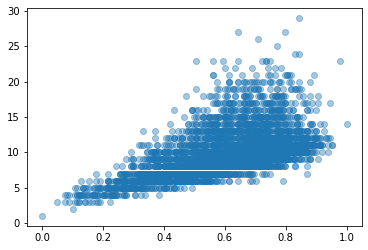

In [15]:
plt.scatter(data[['길이']], data[['나이']], alpha=0.4)
plt.show()

#### 지름과 나이의 상관관계

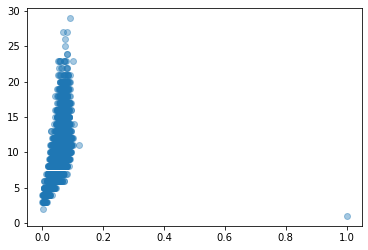

In [16]:
plt.scatter(data[['지름']], data[['나이']], alpha=0.4)
plt.show()

#### 높이와 나이의 상관관계

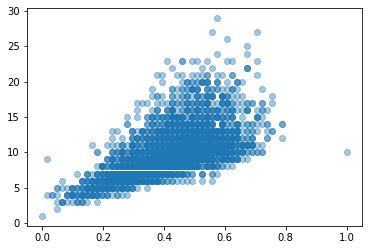

In [17]:
plt.scatter(data[['높이']], data[['나이']], alpha=0.4)
plt.show()

#### 총무게와 나이의 상관관계

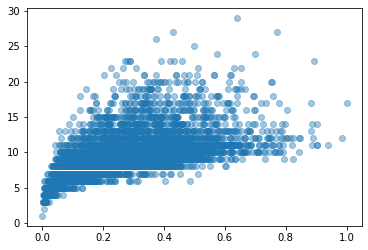

In [18]:
plt.scatter(data[['총무게']], data[['나이']], alpha=0.4)
plt.show()

#### 속살무게와 나이의 상관관계

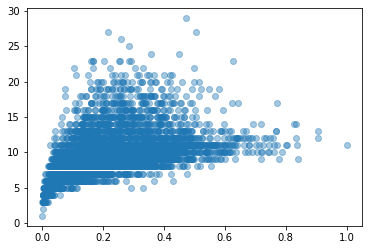

In [19]:
plt.scatter(data[['속살무게']], data[['나이']], alpha=0.4)
plt.show()

#### 내장무게와 나이의 상관관계

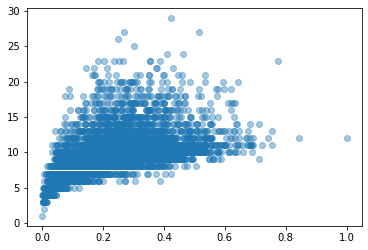

In [20]:
plt.scatter(data[['내장무게']], data[['나이']], alpha=0.4)
plt.show()

### 다중선형회귀

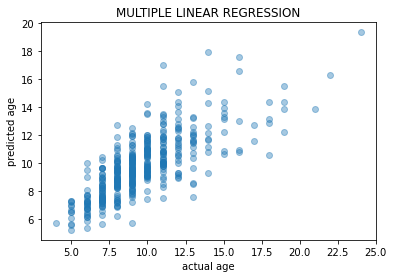

In [21]:
plt.scatter(test_data_label, some_predicted, alpha=0.4)
plt.xlabel("actual age")
plt.ylabel("predicted age")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

## 의사결정트리

In [22]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(train_data, train_data_label)

DecisionTreeRegressor()

In [23]:
from sklearn.metrics import mean_squared_error
some_predicted = model.predict(test_data)
rmse = np.sqrt(mean_squared_error(some_predicted, test_data_label))
print('평균제곱근오차', rmse)

평균제곱근오차 2.745156674484011


#### Compare Different Tree Sizes

In [24]:
def get_mae(max_leaf_nodes, x_train, x_test, y_train, y_test):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(x_train, y_train)
    preds_val = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(preds_val, y_test))
    return(rmse)

In [25]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
ans = 0
res_min = 10000000
for max_leaf_nodes in candidate_max_leaf_nodes:
    res = get_mae(max_leaf_nodes, train_data, test_data , train_data_label, test_data_label)
    print(res)
    if res_min > res:
        res_min = res
        ans = max_leaf_nodes

print("best_tree_size =", ans)

2.375700943673631
2.14543824189341
2.1077703894226634
2.231931852726759
2.4156709182881237
2.518603367243398
best_tree_size = 50


## 랜덤포레스트

In [32]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(train_data, train_data_label.values.ravel() )

RandomForestRegressor()

In [33]:
from sklearn.metrics import mean_squared_error
some_predicted = model.predict(test_data)
rmse = np.sqrt(mean_squared_error(some_predicted, test_data_label))
print('평균제곱근오차', rmse)

평균제곱근오차 1.95877921898006


### 딥러닝

In [34]:
from keras.layers import Dense, Dropout, Activation
from keras.models import Sequential

In [46]:
model = Sequential()
model.add(Dense(512, input_dim=9))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(1))
model.add(Activation('relu'))
model.compile('adam', 'mean_squared_error', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               5120      
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

#### 모델 fitting

In [47]:
train_data = np.asarray(train_data).astype(np.float32)
train_data_label = np.asarray(train_data_label).astype(np.float32)

In [52]:
model.fit(train_data, train_data_label, epochs=30, batch_size=1,)

Epoch 1/30
3759/3759 [==============================] - 5s 1ms/step - loss: 5.5649 - accuracy: 2.6603e-04
Epoch 2/30
3759/3759 [==============================] - 5s 1ms/step - loss: 5.4044 - accuracy: 2.6603e-04
Epoch 3/30
3759/3759 [==============================] - 6s 1ms/step - loss: 5.4150 - accuracy: 2.6603e-04
Epoch 4/30
3759/3759 [==============================] - 5s 1ms/step - loss: 5.3660 - accuracy: 2.6603e-04
Epoch 5/30
3759/3759 [==============================] - 5s 1ms/step - loss: 5.3478 - accuracy: 2.6603e-04
Epoch 6/30
3759/3759 [==============================] - 5s 1ms/step - loss: 5.3093 - accuracy: 2.6603e-04
Epoch 7/30
3759/3759 [==============================] - 6s 1ms/step - loss: 5.3300 - accuracy: 0.0000e+00
Epoch 8/30
3759/3759 [==============================] - 5s 1ms/step - loss: 5.2286 - accuracy: 2.6603e-04
Epoch 9/30
3759/3759 [==============================] - 5s 1ms/step - loss: 5.2282 - accuracy: 2.6603e-04
Epoch 10/30
3759/3759 [=======================

In [55]:
model_predict = model.predict(test_data)

In [56]:
rmse = np.sqrt(mean_squared_error(model_predict, test_data_label))
print('평균제곱근오차', rmse)

평균제곱근오차 1.9686769098562957


## 결론

전복의 Physical 특징을 기반으로 나이를 예측하기 위해, 머신러닝 알고리즘 중, **의사결정트리**와 **랜덤포레스트**와 **딥러닝** 세 가지 방법론을 선택하여 각각의 모델에서 **평균제곱근오차**값을 구했다.

그 결과, **의사결정트리**의 평균제곱근오차 값은 2.108으로 나왔으며, **랜덤포레스트**의 평균제곱근오차 값은 1.959로 나왔다. 마지막으로 **딥러닝**의 평균제곱근오차는 1.969이므로 평균제곱근오차의 값이 가장 낮게 나온 랜덤포레스트 방법론이 가장 적합하다.